In [1]:
import pandas as pd
import os 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Ensure the data directory exists
print(os.listdir(os.path.abspath("../data/movielens_1m")))

# Load datasets
movies = pd.read_csv(os.path.join(os.path.abspath("../data/movielens_1m"), "movies.dat"), sep="::", names=["MovieID", "Title", "Genres"], encoding="latin-1")
ratings = pd.read_csv(os.path.join(os.path.abspath("../data/movielens_1m"), "ratings.dat"), sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], encoding="latin-1")  
users = pd.read_csv(os.path.join(os.path.abspath("../data/movielens_1m"), "users.dat"), sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], encoding="latin-1")


['movies.dat', 'ratings.dat', 'users.dat']


C:\Users\agash\AppData\Local\Temp\ipykernel_980\4138529528.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(os.path.join(os.path.abspath("../data/movielens_1m"), "movies.dat"), sep="::", names=["MovieID", "Title", "Genres"], encoding="latin-1")
C:\Users\agash\AppData\Local\Temp\ipykernel_980\4138529528.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(os.path.join(os.path.abspath("../data/movielens_1m"), "ratings.dat"), sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], encoding="latin-1")
C:\Users\agash\AppData\Local\Temp\ipykernel_980\413852

In [2]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#drop timestamp/irrelevant column
ratings.drop("Timestamp", axis=1, inplace=True)

In [6]:
# Replace pipe characters with spaces for TF-IDF
movies["Genres"] = movies["Genres"].str.replace("|", " ")

In [7]:
# TF-IDF for content-based filtering
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies["Genres"])

In [8]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [9]:
pd.DataFrame(cosine_sim)

,0,1,2,3,4,5,6,7,8,9,...,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882
0,1.000000,0.305525,0.197372,0.260194,0.344351,0.000000,0.197372,0.425153,0.0,0.000000,...,0.344351,0.260194,0.801460,0.000000,0.000000,0.344351,0.000000,0.000000,0.000000,0.000000
1,0.305525,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.718623,0.0,0.320890,...,0.000000,0.000000,0.538118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.197372,0.000000,1.000000,0.433093,0.573172,0.000000,1.000000,0.000000,0.0,0.000000,...,0.573172,0.433093,0.000000,0.000000,0.000000,0.573172,0.000000,0.000000,0.000000,0.000000
3,0.260194,0.000000,0.433093,1.000000,0.755606,0.000000,0.433093,0.000000,0.0,0.000000,...,0.755606,1.000000,0.000000,0.262005,0.000000,0.755606,0.655026,0.655026,0.655026,0.343133
4,0.344351,0.000000,0.573172,0.755606,1.000000,0.000000,0.573172,0.000000,0.0,0.000000,...,1.000000,0.755606,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.344351,0.000000,0.573172,0.755606,1.000000,0.000000,0.573172,0.000000,0.0,0.000000,...,1.000000,0.755606,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3879,0.000000,0.000000,0.000000,0.655026,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.655026,0.000000,0.399991,0.000000,0.000000,1.000000,1.000000,1.000000,0.523847
3880,0.000000,0.000000,0.000000,0.655026,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.655026,0.000000,0.399991,0.000000,0.000000,1.000000,1.000000,1.000000,0.523847
3881,0.000000,0.000000,0.000000,0.655026,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.655026,0.000000,0.399991,0.000000,0.000000,1.000000,1.000000,1.000000,0.523847


In [10]:
ratings.head()

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [11]:
from surprise import accuracy
# Collaborative filtering using Surprise SVD
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[["UserID", "MovieID", "Rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train model
svd = SVD()
svd.fit(trainset)

# Predict ratings on the test set
predictions = svd.test(testset)

# Evaluate using RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.8736
MAE:  0.6851


In [12]:
def hybrid_recommendation(user_id, movie_title, top_n=10):

    # Find the index of the input movie
    idx = movies[movies["Title"] == movie_title].index[0]

    # Get content-based similar movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:50]

    # Predict user rating for each similar movie
    recommendations = []
    for movie_idx, sim_score in sim_scores:
        movie_id = movies.iloc[movie_idx]["MovieID"]
        try:
            pred_rating = svd.predict(user_id, movie_id).est
            recommendations.append((movies.iloc[movie_idx]["Title"], pred_rating))
        except:
            continue

    # Return top N predicted ratings
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]

    # Example usage/test the system
user_id = 1
movie_title = "Toy Story (1995)"
top_n = 10
recommendations = hybrid_recommendation(user_id, movie_title, top_n)

In [13]:
from surprise import accuracy
rmse = accuracy.rmse(recommendations)
mae = accuracy.mae(recommendations)

ValueError: not enough values to unpack (expected 5, got 2)

In [ ]:
for i, (title, score) in enumerate(recommendations, 1):
    print(f"{i}. {title} - Predicted Rating: {score:.2f}")


1. Wrong Trousers, The (1993) - Predicted Rating: 4.51
2. Toy Story 2 (1999) - Predicted Rating: 4.35
3. Pinocchio (1940) - Predicted Rating: 4.23
4. Chicken Run (2000) - Predicted Rating: 4.18
5. Iron Giant, The (1999) - Predicted Rating: 4.17
6. Jungle Book, The (1967) - Predicted Rating: 4.13
7. Bug's Life, A (1998) - Predicted Rating: 4.11
8. Bambi (1942) - Predicted Rating: 4.09
9. Charlotte's Web (1973) - Predicted Rating: 4.07
10. Secret of NIMH, The (1982) - Predicted Rating: 4.06


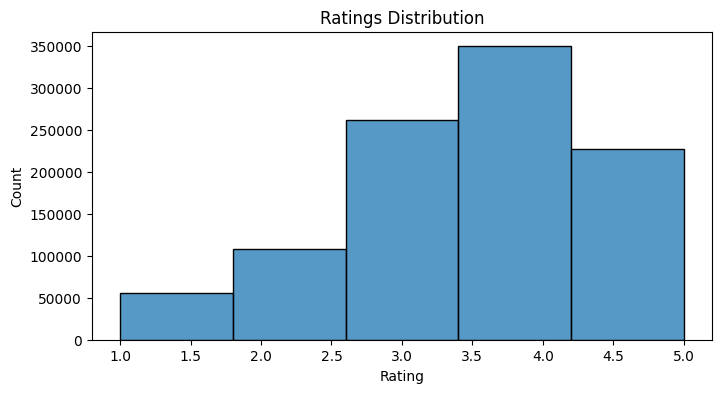

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(ratings["Rating"], bins=5, kde=False)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


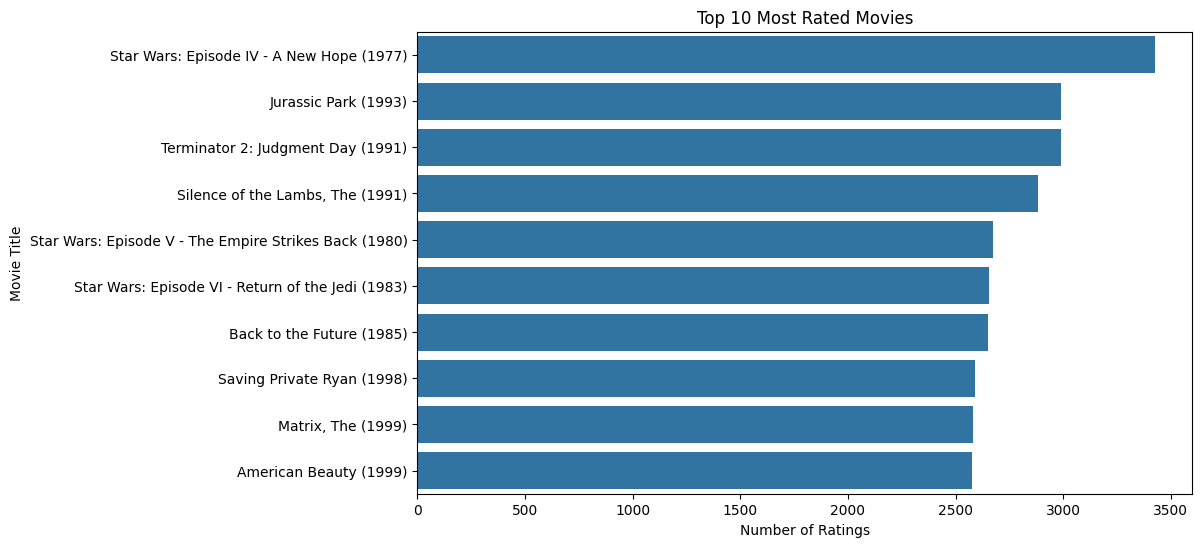

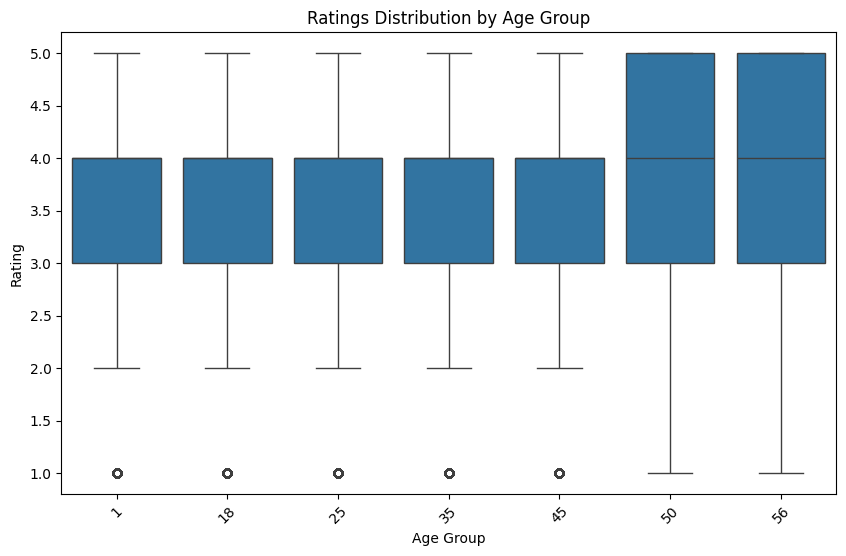

In [ ]:
top_movies = ratings["MovieID"].value_counts().head(10)
top_movie_names = movies[movies["MovieID"].isin(top_movies.index)]["Title"]
top_counts = top_movies.values

plt.figure(figsize=(10, 6))
sns.barplot(x=top_counts, y=top_movie_names)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()


# Visualize the distribution of ratings by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x="Age", y="Rating", data=ratings.merge(users, on="UserID"))
plt.title("Ratings Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#save models for deployment
import joblib
joblib.dump(svd, "svd_model.pkl")


['svd_model.pkl']

In [ ]:
import joblib
joblib.dump(cosine_sim, "cosine_sim.pkl")

['cosine_sim.pkl']

In [ ]:
movies.to_csv("movies.csv", index=False)